In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from getpass import getpass
import time
pd.options.display.max_rows = 50

import sys
sys.path.append('../src/')
from wodupscraper import WodUp

In [3]:
email = 'hasan.nagib@gmail.com'
password = getpass('Enter WodUP password:')

Enter WodUP password:········


# `WodUp` scraper object

This will let us log in WodUp and navigate to profile we want to crawl. Save all scraped data in `wodup_data` dictionary.

In [4]:
wodup_data = {}

In [5]:
users = ['danielkim', 'hasannagib']

for user in users:
    wu = WodUp(email, password, url=f'http://wodup.com/{user}')
    movements = ['front-squat', 'back-squat', 'deadlift', 'barbell-bench-press']
    time.sleep(2)
    for movement in movements:
        wu.get_log(movement)
    wu.clean_all_logs()
    wodup_data[user] = wu
    wu.browser.quit()

/Users/hasannagib/opt/anaconda3/envs/autowod/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1215: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


Raw scraped data contains both strength and metcon workouts (e.g. see row 19 onwards). In the cleaned up output we exclude the metcon workouts. 

In [6]:
wodup_data['hasannagib'].raw_logs['back-squat'].head(25)

,date,reps,weights
0,13 Aug,Back Squat 12-8-5-5-5,95 – 135 – 235 – 245 – 250 lbs
1,4 Jul,Back Squat 8 x 5,95 – 135 – 185 – 235 – 235 – 235 – 235 – 235 lbs
2,28 Jun,Back Squat 5-4-3-2-1-1-1-1-1,95 – 135 – 185 – 225 – 255 – 275 – 295 – 295 –...
3,9 Jun,Back Squat 5-5-5-5-3-1-1-1-0-0,45 – 95 – 135 – 185 – 225 – 245 – 275 – 285 lbs
4,5 Apr,Back Squat 8-8-7-6-5-4-3-2-1-1-1-1-,45 – 95 – 115 – 135 – 155 – 185 – 225 – 235 – ...
5,15 Mar,Back Squat 8-7-6-5-5-5-5-5,95 – 135 – 185 – 225 – 225 – 225 – 225 – 230 lbs
6,29 Feb,Back Squat 8-6-5-3-3-3-3-2-1-1-1,45 – 95 – 135 – 185 – 185 – 225 – 235 – 240 – ...
7,24 Feb,Back Squat 12-8-5-5-5,95 – 115 – 185 – 205 – 225 lbs
8,15 Feb,Back Squat 7 x 5,95 – 185 – 215 – 215 – 215 – 215 – 220 lbs
9,5 Feb,Back Squat 1RM,5x135 – 3x185 – 2x225 lbs


Cleaned up logs contain a `reps_list` and `weights_list` that are of equal length.

In [7]:
wodup_data['hasannagib'].logs['back-squat'].head()

,date,reps,weights,reps_list,weights_list
0,2020-08-13,12-8-5-5-5,95 – 135 – 235 – 245 – 250 lbs,"[12, 8, 5, 5, 5]","[95, 135, 235, 245, 250]"
1,2020-07-04,8 x 5,95 – 135 – 185 – 235 – 235 – 235 – 235 – 235 lbs,"[5, 5, 5, 5, 5, 5, 5, 5]","[95, 135, 185, 235, 235, 235, 235, 235]"
2,2020-06-28,5-4-3-2-1-1-1-1-1,95 – 135 – 185 – 225 – 255 – 275 – 295 – 295 –...,"[5, 4, 3, 2, 1, 1, 1, 1, 1]","[95, 135, 185, 225, 255, 275, 295, 295, 295]"
3,2020-06-09,5-5-5-5-3-1-1-1-0-0,45 – 95 – 135 – 185 – 225 – 245 – 275 – 285 lbs,"[5, 5, 5, 5, 3, 1, 1, 1]","[45, 95, 135, 185, 225, 245, 275, 285]"
4,2020-04-05,8-8-7-6-5-4-3-2-1-1-1-1-,45 – 95 – 115 – 135 – 155 – 185 – 225 – 235 – ...,"[8, 8, 7, 6, 5, 4, 3, 2, 1, 1, 1, 1]","[45, 95, 115, 135, 155, 185, 225, 235, 245, 25..."


This DataFrame can be exploded using the `gen_movement_hist()` method. This exploded view will be convient for generating lift charts to show performance improvements over time.

In [8]:
wodup_data['hasannagib'].gen_movement_hist('back-squat')

,date,weights,reps
0,2020-08-13,95.0,12.0
1,2020-08-13,135.0,8.0
2,2020-08-13,235.0,5.0
3,2020-08-13,245.0,5.0
4,2020-08-13,250.0,5.0
...,...,...,...
120,2019-10-24,155.0,3.0
121,2019-10-01,135.0,5.0
122,2019-10-01,185.0,4.0
123,2019-10-01,205.0,2.0


# Visualize lift data

In [37]:
def plot_hist(movement, rep_range, max_to_date=True):
    plt.figure()
    for user, wu in wodup_data.items():
        df_hist = wu.gen_movement_hist(movement)
        df_plot = df_hist.query(f'reps>={rep_range[0]} and reps<={rep_range[1]}').sort_values('date')
        if max_to_date:
            np.maximum.accumulate(df_plot).set_index('date')['weights'].plot(style='o-');
        else:
            df_plot.set_index('date')['weights'].plot(style='-');
    plt.grid()
    movement_name = ' '.join([i.capitalize() for i in movement.split('-')])
    plt.ylabel(f'{movement_name} (lbs)')
    plt.legend(wodup_data.keys(), bbox_to_anchor=(1.02, 1), loc='upper left')

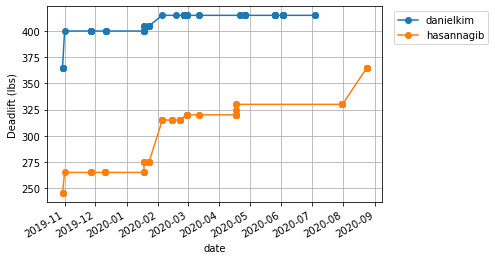

In [38]:
plot_hist('deadlift', (1,5), max_to_date=True)

In [39]:
interact(
    plot_hist,
    movement=['back-squat', 'front-squat', 'deadlift', 'barbell-bench-press'],
    rep_range = widgets.IntRangeSlider(
        value=[1, 5], min=1, max=10, step=1,
        description='rep range:',
    )   
    
);

interactive(children=(Dropdown(description='movement', options=('back-squat', 'front-squat', 'deadlift', 'barb…

## Export data

In [12]:
user = 'hasannagib'
for movement,df in wodup_data[user].logs.items():
    df.to_csv(f'../data/{user}-{movement}.csv')

## PR Table

In [13]:
df_pr = wodup_data['hasannagib'].gen_all_pr_tables()
df_pr

,date,front-squat,date,back-squat,date,deadlift,date,barbell-bench-press
reps,,,,,,,,
1.0,2020-04-30,225.0,2020-06-28,295.0,2020-08-24,365.0,2020-07-31,230.0
2.0,2020-04-30,205.0,2020-06-28,250.0,2020-07-31,300.0,2020-07-31,205.0
3.0,2020-06-17,205.0,2020-06-28,250.0,2020-08-24,295.0,2020-07-31,195.0
4.0,2020-04-30,205.0,2020-06-28,250.0,2020-04-17,275.0,2020-04-30,185.0
5.0,2020-06-17,205.0,2020-08-13,250.0,2020-08-24,275.0,2020-07-31,185.0
6.0,2020-04-30,155.0,2020-04-05,210.0,2020-04-17,255.0,2020-04-30,155.0
7.0,2020-04-30,155.0,2020-04-05,210.0,2020-04-17,235.0,2020-04-30,155.0
8.0,2020-04-30,155.0,2020-08-13,210.0,2020-04-17,235.0,2020-07-31,155.0
9.0,NaT,NaN,NaT,NaN,NaT,NaN,2019-10-23,85.0


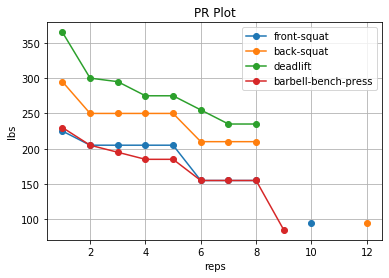

In [40]:
df_pr.drop(columns=['date']).plot(style='o-');
plt.grid()
plt.ylabel('lbs');
plt.title('PR Plot');